In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# % matplotlib inline
file = "../Datasets/kc_house_data.csv"
df = pd.read_csv(file, parse_dates=['date'], dayfirst=True)
df.drop("id", axis=1, inplace=True)
df['floors'].value_counts().to_frame()

In [11]:
b = df.waterfront == 0
df.loc[b].count()

date             21450
price            21450
bedrooms         21450
bathrooms        21450
sqft_living      21450
sqft_lot         21450
floors           21450
waterfront       21450
view             21450
condition        21450
grade            21450
sqft_above       21450
sqft_basement    21450
yr_built         21450
yr_renovated     21450
zipcode          21450
lat              21450
long             21450
sqft_living15    21450
sqft_lot15       21450
dtype: int64

<AxesSubplot:xlabel='waterfront', ylabel='price'>

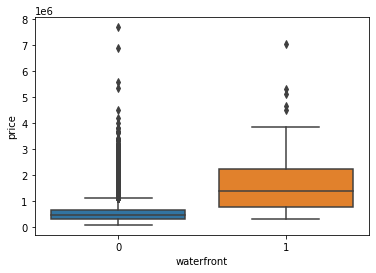

In [7]:
sns.boxplot(x="waterfront", y="price", data=df)

<AxesSubplot:xlabel='sqft_above', ylabel='price'>

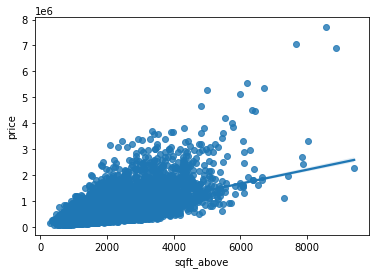

In [6]:
sns.regplot(x="sqft_above", y="price", data=df)

In [ ]:
df.corr()['price'].sort_values()

In [8]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm
lm.fit(X, Y)
lm.score(X, Y)

0.00046769430149007363

In [9]:
lm = LinearRegression()
lm
X = df[['sqft_living']]
Y = df['price']
lm.fit(X,Y)
lm.score(X,Y)

0.4928532179037931

In [10]:
y_data = df['price']
x_data=df.drop('price',axis=1)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

lre=LinearRegression()

lre.fit(x_train[['sqft_living']], y_train)
lre.score(x_test[['sqft_living']], y_test)


number of test samples : 3242
number of training samples: 18371


0.4910058627910614

In [11]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]
lm = LinearRegression()
lm
X = df[['floors']]
Y = df['price']
lm.fit(X,Y)
lm.score(X,Y)


0.06594310068341092

In [12]:
lm = LinearRegression()
lm
X = df[['waterfront']]
Y = df['price']
lm.fit(X,Y)
lm.score(X,Y)

0.07095267538578309

In [13]:
lm = LinearRegression()
lm
X = df[['lat']]
Y = df['price']
lm.fit(X,Y)
lm.score(X,Y)

0.09425113672917462

In [14]:
lm = LinearRegression()
lm
X = df[['bedrooms']]
Y = df['price']
lm.fit(X,Y)
lm.score(X,Y)

0.09507947467657651

In [15]:
lm = LinearRegression()
lm
X = df[['sqft_basement']]
Y = df['price']
lm.fit(X,Y)
lm.score(X,Y)

0.104856815269744

In [16]:
lm = LinearRegression()
lm
X = df[['view']]
Y = df['price']
lm.fit(X,Y)
lm.score(X,Y)

0.15784211584121532

In [17]:
lm = LinearRegression()
lm
X = df[['bathrooms']]
Y = df['price']
lm.fit(X,Y)
lm.score(X,Y)

0.27576939959239877

In [18]:
lm = LinearRegression()
lm
X = df[['sqft_living15']]
Y = df['price']
lm.fit(X,Y)
lm.score(X,Y)

0.3426684607560171

In [19]:
lm = LinearRegression()
lm
X = df[['sqft_above']]
Y = df['price']
lm.fit(X,Y)
lm.score(X,Y)

0.3667117528382793

In [20]:
lm = LinearRegression()
lm
X = df[['grade']]
Y = df['price']
lm.fit(X,Y)
lm.score(X,Y)

0.44546848610928724

In [21]:
lm = LinearRegression()
lm
X = df[['sqft_living']]
Y = df['price']
lm.fit(X,Y)
lm.score(X,Y)

0.4928532179037931

In [22]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [23]:
pipe.fit(X, Y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [24]:
pipe.score(X, Y)

0.5327430940591443

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features ]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("número de amostras de ensaio:", x_test.shape[0])
print("número de amostras de formação:",x_train.shape[0])


número de amostras de ensaio: 3242
número de amostras de formação: 18371


In [26]:
from sklearn.linear_model import Ridge
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['floors', 'waterfront','lat' ,'bedrooms' ,'sqft_basement' ,'view' ,'bathrooms','sqft_living15','sqft_above','grade','sqft_living']])
x_test_pr=pr.fit_transform(x_test[['floors', 'waterfront','lat' ,'bedrooms' ,'sqft_basement' ,'view' ,'bathrooms','sqft_living15','sqft_above','grade','sqft_living']])
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train_pr, y_train)

Ridge(alpha=0.1)

In [27]:
RidgeModel.score(x_train_pr, y_train)

0.7418393311022126

In [28]:
RidgeModel.score(x_test_pr, y_test)

0.7004432097062769

In [29]:
Rsqu_test = []
Rsqu_train = []
ALFA = 10 * np.array(range(0,1000))
for alfa in ALFA:
    RigeModel = Ridge(alpha=alfa)
    RigeModel.fit(x_train_pr, y_train)
    Rsqu_test.append(RigeModel.score(x_test_pr, y_test))
    Rsqu_train.append(RigeModel.score(x_train_pr, y_train))

c:\Users\Allsoft Studio\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.80044e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\Allsoft Studio\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=3.33595e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\Allsoft Studio\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.16631e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\Allsoft Studio\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.90116e-17): result may no

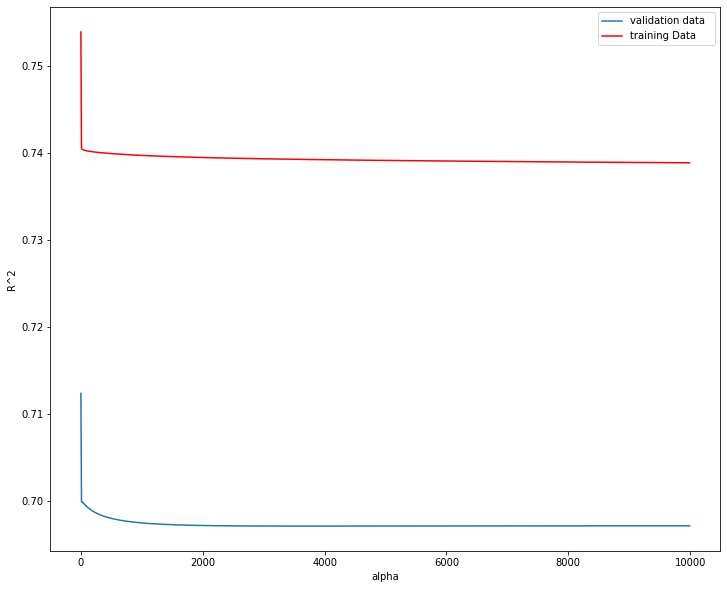

In [30]:
width = 12
height = 10
plt.figure(figsize=(width, height))
plt.plot(ALFA,Rsqu_test, label='validation data  ')
plt.plot(ALFA,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

In [31]:
from sklearn.preprocessing import PolynomialFeatures
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [32]:
x_train_pr=pr.fit_transform(x_train[['floors', 'waterfront','lat' ,'bedrooms' ,'sqft_basement' ,'view' ,'bathrooms','sqft_living15','sqft_above','grade','sqft_living']])

x_polly=pr.fit_transform(x_train[['floors', 'waterfront','lat' ,'bedrooms' ,'sqft_basement' ,'view' ,'bathrooms','sqft_living15','sqft_above','grade','sqft_living']])

RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train_pr, y_train)
RidgeModel.score(x_train_pr, y_train)

0.7418393311022126

In [33]:
x_test_pr=pr.fit_transform(x_test[['floors', 'waterfront','lat' ,'bedrooms' ,'sqft_basement' ,'view' ,'bathrooms','sqft_living15','sqft_above','grade','sqft_living']])

x_polly=pr.fit_transform(x_test[['floors', 'waterfront','lat' ,'bedrooms' ,'sqft_basement' ,'view' ,'bathrooms','sqft_living15','sqft_above','grade','sqft_living']])

RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_test_pr, y_test)
RidgeModel.score(x_test_pr, y_test)

0.7655946473106067